# Feed-Forward Neural Network

In [99]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from create_submission import create_csv_submission
from sklearn.preprocessing import StandardScaler
import keras
import matplotlib.pyplot as plt

In [6]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print(X_train.shape)

(2499130, 80)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=23)

In [9]:
print(X_train.shape)
print(X_valid.shape)

(1999304, 80)
(499826, 80)


In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation

In [126]:
np.random.seed(23)

In [127]:
model = Sequential()
model.add(Dense(128, input_dim=80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [128]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
model.fit(X_train, y_train, epochs=15, batch_size=128)

Epoch 1/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.4071 - acc: 0.8039
Epoch 2/15
1999304/1999304 [==============================] - 41s 21us/step - loss: 0.3880 - acc: 0.8153
Epoch 3/15
1999304/1999304 [==============================] - 41s 21us/step - loss: 0.3820 - acc: 0.8186
Epoch 4/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3785 - acc: 0.8206
Epoch 5/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3760 - acc: 0.8221
Epoch 6/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3740 - acc: 0.8233
Epoch 7/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3725 - acc: 0.8242
Epoch 8/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3713 - acc: 0.8248
Epoch 9/15
1999304/1999304 [==============================] - 42s 21us/step - loss: 0.3702 - acc: 0.8254
Epoch 10/15
1999304/1999304 [==========================

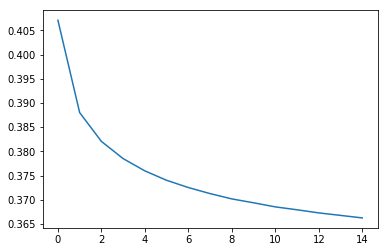

In [130]:
plt.plot(model.history.epoch, model.history.history['loss'])

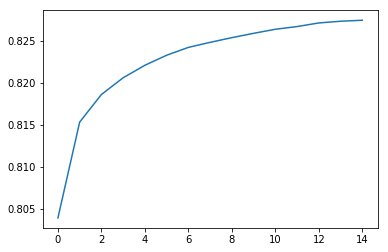

In [131]:
plt.plot(model.history.epoch, model.history.history['acc'])

In [132]:
model.evaluate(X_valid, y_valid)

499826/499826 [==============================] - 14s 28us/step


[0.37662492663271996, 0.8217699759509156]

***

In [133]:
X_test = np.load('X_test.npy')
X_test = scaler.transform(X_test)

In [134]:
X_test.shape

(10000, 80)

In [135]:
pred = model.predict_classes(X_test)

In [136]:
pred[pred == 0] = -1

In [137]:
pred = pred.flatten()

In [138]:
create_csv_submission(range(1,10001), pred, 'output.csv')